In [22]:
import pandas as pd
import matplotlib.pyplot as myplot
import seaborn as mysb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

pima = pd.read_csv("/home/nasc/Documents/G/ML/doc/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


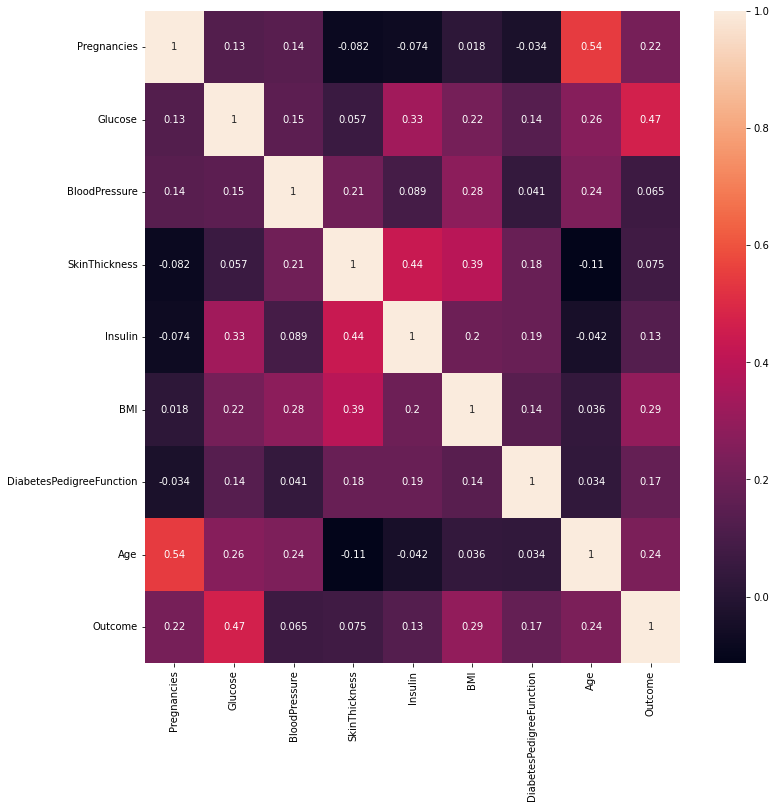

In [24]:
myplot.figure(figsize = (12,12))
mysb.heatmap(pima.corr(), annot = True)
myplot.show()

In [25]:
features = ['Pregnancies','Insulin','BMI','Age','DiabetesPedigreeFunction','Glucose']
x = pima[features]
y = pima.Outcome
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)

In [27]:
ypred = classifier.predict(x_test)
print(ypred)


[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [30]:
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))


[[125  21]
 [ 42  43]]
0.7272727272727273


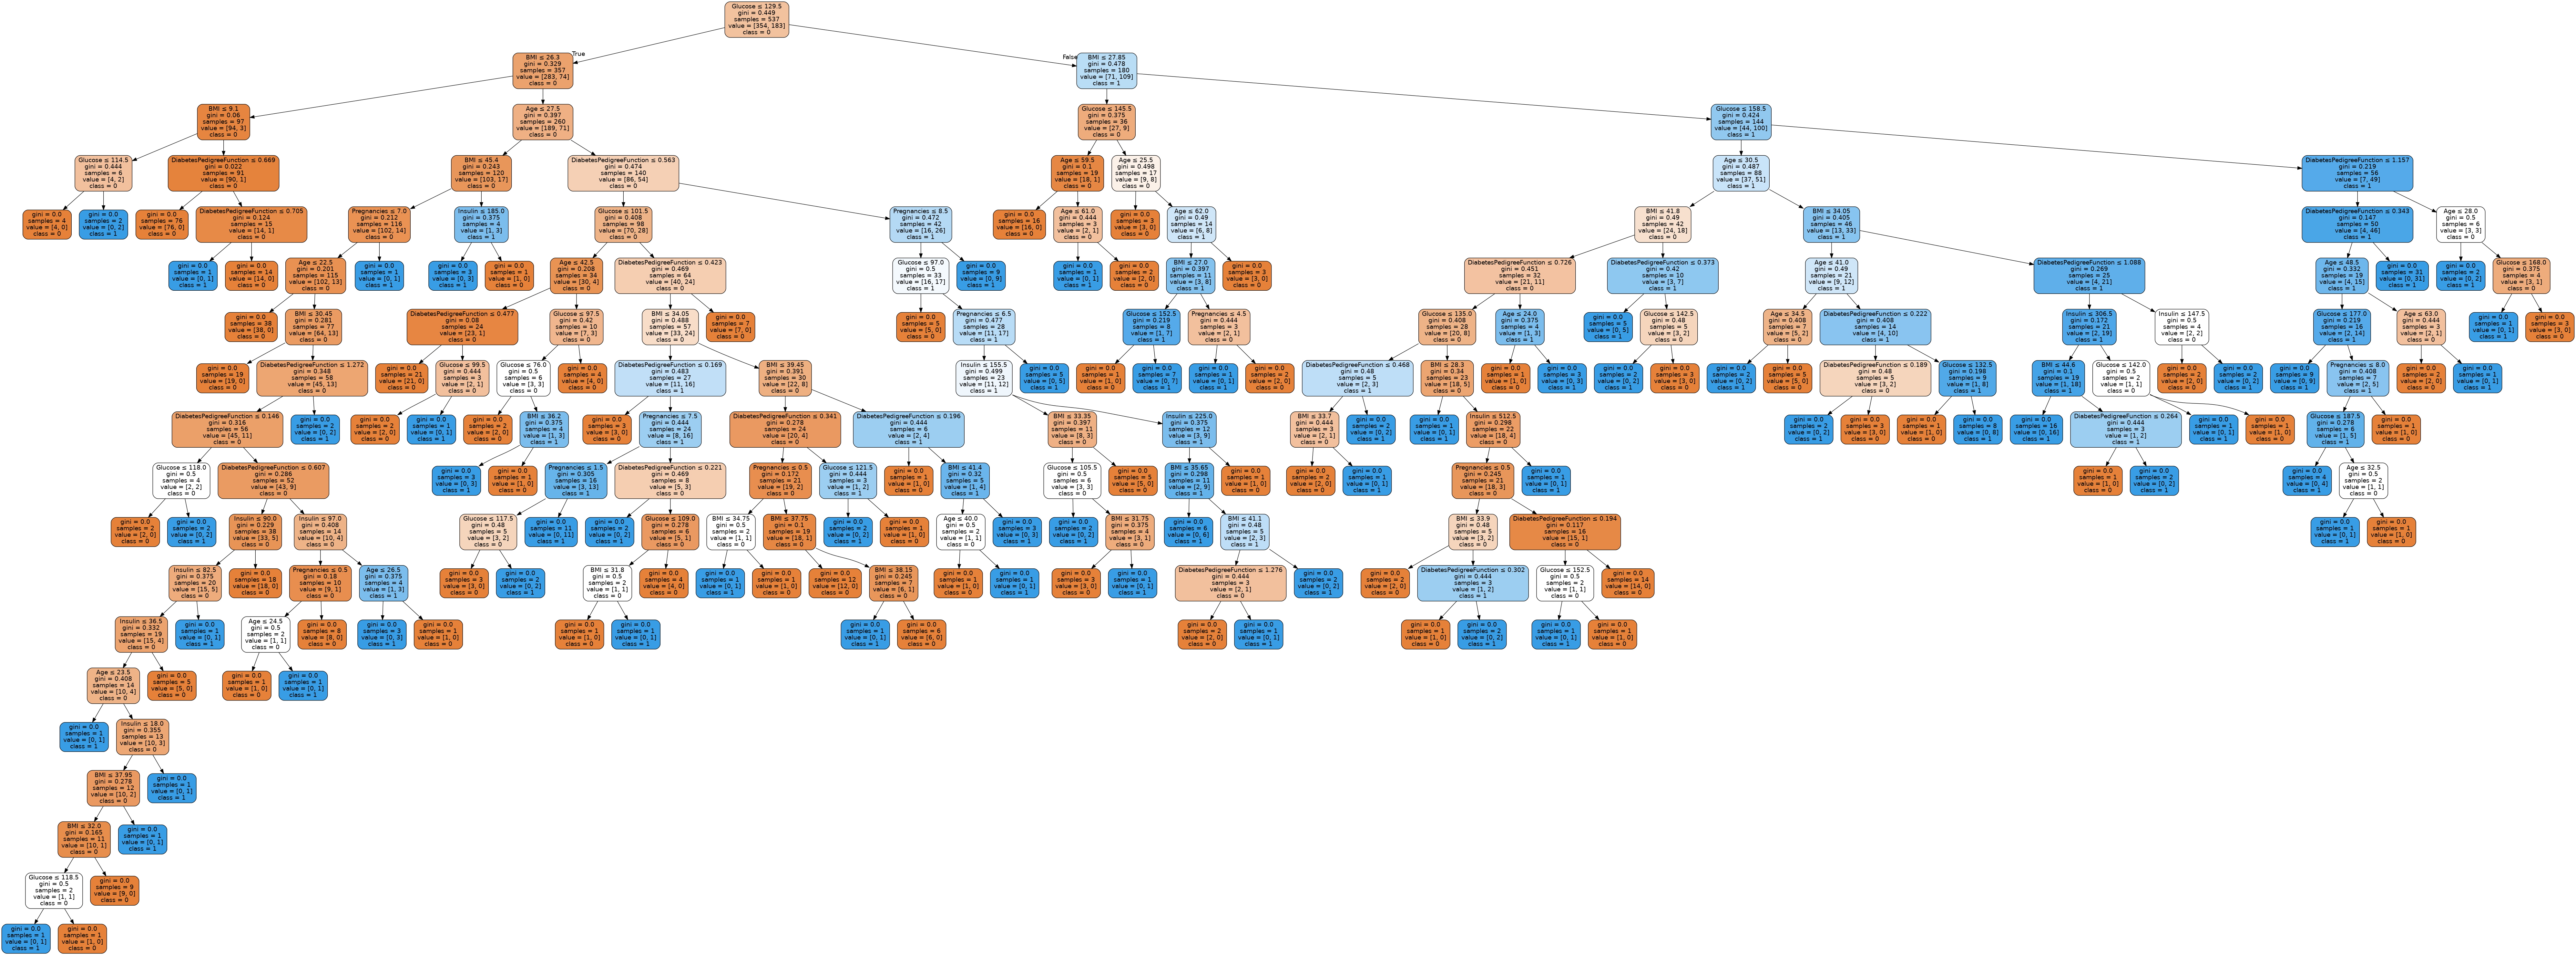

In [36]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


